<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Aarif Razak<br>
<b>NetID</b>: ah58<br>
<b>Recitation (1,2,90,91)</b>: 2<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:      AR
 
   

<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2021

# Lab 2: Working with Pandas

### Due Date : Wednesday September 29, 2021 by 11:59 PM.###

### Instructions


This is an introductory lab on Python/Pandas. The purpose of this lab is to learn how to use 
some basic commands in Pandas in your data science projects. We will also do some data analysis with a real dataset of babynames. This lab is presented as a Jupyter notebook. 
Please execute the cells (SHIFT-ENTER) that are already completed and then your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###


[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (ie. selecting rows and columns)
* Filtering data (using boolean arrays)
* Data Aggregation/Grouping dataframes
* Merging dataframes

In this lab, you are going to use several pandas methods like `drop()`, `loc[]`, `groupby()`. You may press `shift+tab` on the method parameters to see the documentation for that method.

**Just as a side note**: Pandas operations can be confusing at times and the documentation is not that great, but it is OK to be stumped when figuring out why a piece of code is not doing what it's supposed to. We don't expect you to memorize all the different Pandas functions, just know the basic ones like `iloc[]`, `loc[]`, slicing, and other general dataframe operations. For exams and quizzes, you will get a Pandas cheat sheet.

Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!  You need to learn how to read documentation.

## Setup
The first step in this lab is to setup the environment. We will read in pandas, numpy and matplotlib

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a two-dimensional labeled data structure with columns of potentially different types.

The pandas [`DataFrame` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) provides at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [6]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [7]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a data frame by using the shape attribute dataframe.shape

In [8]:
(num_rows, num_columns) = fruit_info.shape
num_rows, num_columns

(4, 2)

# Task 1 - Panda Basics

### Activity 1.1 - adding columns

You can add a column by `dataframe['new column name'] = [data]`. Please add a column called `rank1` to the `fruit_info` table which contains a 1,2,3, or 4 based on your personal preference ordering for each fruit. 


In [9]:
### BEGIN SOLUTION
fruit_info['rank1'] = [3, 2, 1, 4] #bananas are just better overall!

### END SOLUTION

In [39]:
# print the data frame to see if the column has been added
fruit_info
#print(fruit_info["rank1"].dtype)

int64


In [10]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info["rank1"].dtype == np.int64
assert len(fruit_info["rank1"].dropna()) == 4
### END SOLUTION

### Activity 1.2 - adding columns II

You can ALSO add a column by `dataframe.loc[:, 'new column name'] = [data]`. This way to modify an existing dataframe is preferred over the assignment above. In other words, it is best that you use `loc[]`. Although using `loc[]` is more verbose, it is faster. (However, this tradeoff is more likely to be valuable in production than during interactive use.) In lecture we will explain in more detail what `loc[]` does, but essentially, the first parameter is for the rows and second is for columns. The `:` means keep all rows and the `new column name` indicates the column you are modifying or in this case adding. 

Please add a column called `rank2` to the `fruit_info` table which contains a 1,2,3, or 4 based on your personal preference ordering for each fruit. Use the loc to do this.


In [12]:
### BEGIN SOLUTION
fruit_info.loc[:, 'rank2'] = [3,2,1,4]

### END SOLUTION

In [13]:
fruit_info


,fruit,color,rank1,rank2
0,apple,red,3,3
1,orange,orange,2,2
2,banana,yellow,1,1
3,raspberry,pink,4,4


In [14]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info["rank2"].dtype == np.int64
assert len(fruit_info["rank2"].dropna()) == 4
### END SOLUTION

### Activity 1.3 - dropping columns

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the both the `rank1` and `rank2` columns you created. (Make sure to use the `axis` parameter correctly) 

Hint: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once, it may involve a list.

In [15]:
### BEGIN SOLUTION

fruit_info.drop(['rank1', 'rank2'], axis =1) #axis 1 means we remove the columns

### END SOLUTION

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [16]:
fruit_info_original = fruit_info.drop(['rank1', 'rank2'], axis =1) #experimental, normally this is just fruit_info_original

In [17]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info_original.shape[1] == 2
### END SOLUTION

### Activity 1.4 - Renaming columns

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with a capital letter. Set the `inplace` parameter correctly to change the `fruit_info_original` dataframe. (**Hint:** in Question 2, `drop` creates and returns a new dataframe instead of changing `fruit_info` because `inplace` by default is `False`)

In [61]:
### BEGIN SOLUTION

fruit_info_original.rename(columns= {'fruit': 'Fruit', 'color': 'Color'}, inplace = True)

### END SOLUTION

In [62]:
fruit_info_original

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [63]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info_original.columns[0] == 'Fruit'
assert fruit_info_original.columns[1] == 'Color'
### END SOLUTION

# Task 2 - Babyname case study
Now that we have learned the basics of data frames, let's move on to a babynames dataset. The babynames data set contains babynames from all states. We will clean and wrangle a data frame with babynames data for the remainder of this lab.

## Helper Function
### `fetch_and_cache` Helper

Downloading large files take time. If you have to download the file everytime you execute this notebook, things can be slow and inefficient. To do this task once, we will use the following function for downloading and caching the data in the `data/` directory and returns the `Path` to the downloaded file. We can use this function throughout the course, so that we save the download bandwidth. This function checks the local data directory for the file name, before attempting to download. Note that, going forward, we will maintain a "data" folder in our lab working folder. 

In [107]:
# Author: Berkeley Data Science Group
def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    import requests
    from pathlib import Path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        birth_time = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded:", birth_time)
    return file_path

Let us step through the above function and identify some of the key lines.

In Python, whenever you want to check if a file exists in a certain path, it is not sufficient to just have the string representation of the path, you need to create a Path object usign the `Path()` constructor. Essentially, after the Path object is created for the directory, a directory is created at that path location using the `mkdir()` method. Then, within the directory, a path for the file itself is created and if the path has already been linked (a.k.a file has already been created and put in the directory), then a new one is not created and instead uses the cached version.

The function `exists()` in the code above is one way to check if a file exists at a certain path when called on a path object. There is also another way this can be done using the `os` library in Python. If you decided to use the `os` library, you wouldn't need to create a Path object and rather pass in the the string representation of the path.

Now, going back to the code, if the path hasn't been linked, then the file is downloaded and created at the path location. 

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use fetch and cache to download the `namesbystate.zip` zip file. 

**This might take a little while!**

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data in a New Jersey region. There should be a total of ???  records.

## Activity 2.1-  Download Babynames Data Set
The zip file is approximately 21 MB. It might take a little time to download.But once you downloaded, it should always be available in the data folder for your lab.

In [109]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
# use fetct_and_cache to avoid multiple downloads.
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Using cached version downloaded: Thu Sep 23 11:13:48 2021


The following cell builds the final full `baby_names` DataFrame. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 


In [110]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

field_names = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=field_names)

# List comprehension
states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = pd.concat(states).reset_index(drop=True)

In [6]:
# print key information about this data frame
baby_names.head()
len(baby_names)

6215834

In [7]:
# find the number of records in the file
#assert(len(baby_names) == 6028151) OLD 
assert(len(baby_names) == 6215834)

## Activity 2.2 - Slicing Data Frames - Selecting rows and columns


### Selection Using Label

**Column Selection** 
To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage looks like `frame.loc[rowname,colname]`. (Reminder that the colon `:` means "everything").  For example, if we want the `color` column of the `ex` data frame, we would use : `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would give select the columns `Name` and the columns after.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `frame['colname']`.

**Row Selection**
Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [118]:
# Select rows 2:5 and the column 'Name'
### BEGIN SOLUTION
baby_names.loc[2:5, 'Name']
### END SOLUTION


2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [119]:
# Select rows 2:5 and column names using a list ['name']
### BEGIN SOLUTION
baby_names.loc[2:5, ['Name']]
### END SOLUTION


,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


There is another Pandas slicing function called `iloc[]` which lets you slice the dataframe by row id and column id instead of by column name and row index (for `loc[]`). This is really the main difference between the 2 functions and it is important that you remember the difference and why you might want to use one over the other. 

In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference.

In [120]:
# Select row indices 1:4 and column idex 3 using iloc
### BEGIN SOLUTION
baby_names.iloc[1:4, 3]
### END SOLUTION


1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

In [121]:
# select row indices 1:3 and column "name" using loc
### BEGIN SOLUTION
baby_names.loc[1:3, 'Name']
### END SOLUTION


1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [122]:
# Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [28]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [29]:
# Example: 
# df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


## Activity 2.3
Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

In [123]:
### BEGIN SOLUTION
name_and_year = baby_names.loc[:, ["Name", "Year"]]
### END SOLUTION

In [28]:
name_and_year.shape

(6215834, 2)

In [124]:
### BEGIN SOLUTION
# complete the assert statements below
assert name_and_year.shape == (6215834, 2)
assert name_and_year.loc[0,"Name"] == 'Mary'
assert name_and_year.loc[0,"Year"] == 1910
### END SOLUTION

As you may have noticed above, the .loc() method is a way to re-order the columns within a dataframe.

## Activity 2.4 - Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, culling out fishy outliers, or analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df[column name] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in New Jersey

In [125]:
### BEGIN SOLUTION
# construct a DataFrame containing only the names registered in NJ. 
# The table below shows the expected answer.
nj = baby_names[baby_names['State'] == 'NJ']
nj
### END SOLUTION

,State,Sex,Year,Name,Count
3666080,NJ,F,1910,Mary,593
3666081,NJ,F,1910,Helen,438
3666082,NJ,F,1910,Anna,355
3666083,NJ,F,1910,Margaret,311
3666084,NJ,F,1910,Elizabeth,260
...,...,...,...,...,...
3823186,NJ,M,2020,Zahid,5
3823187,NJ,M,2020,Zakaria,5
3823188,NJ,M,2020,Zen,5
3823189,NJ,M,2020,Ziad,5


## Activity 2.5
Select the names in Year 2000 (for all baby_names) that have larger than 3000 counts. What do you notice?

(If you use `p & q` to filter the dataframe, make sure to use `df[df[(p) & (q)]]` or `df.loc[df[(p) & (q)]])`

**Remember** that both slicing and using `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

In [32]:
### BEGIN SOLUTION
result = baby_names.loc[(baby_names['Year'] == 2000) & (baby_names['Count'] > 3000)]
### END SOLUTION

In [67]:
result

,State,Sex,Year,Name,Count
725638,CA,M,2000,Daniel,4342
725639,CA,M,2000,Anthony,3839
725640,CA,M,2000,Jose,3804
725641,CA,M,2000,Andrew,3600
725642,CA,M,2000,Michael,3572
725643,CA,M,2000,Jacob,3520
725644,CA,M,2000,Joshua,3356
725645,CA,M,2000,Christopher,3336
725646,CA,M,2000,David,3280
725647,CA,M,2000,Matthew,3254


In [68]:
### BEGIN SOLUTION
# complete the assert statements below
assert len(result) == 11
assert result["Count"].sum() == 39000
assert result["Count"].iloc[0] == 4342
### END SOLUTION


## Activity 2.6 - Data Aggregration (Grouping Data Frames)

To count the number of instances of each unique value in a `Series`, we can use the `value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) as `df["col_name"].value_counts()`. Count the number of different names for each Year in `NJ` (New Jersey).  (You may use the `nj` DataFrame created above.)

**Note:** *We are not computing the number of babies but instead the number of names (rows in the table) for each year.*

In [71]:
### BEGIN SOLUTION
num_of_names_per_year= nj['Year'].value_counts()
### END SOLUTION

In [78]:
num_of_names_per_year[:5]

2007    2567
2008    2536
2009    2530
2014    2513
2019    2498
Name: Year, dtype: int64

In [79]:
### BEGIN SOLUTION
# complete the assert statements below
assert num_of_names_per_year[2007] == 2567
assert num_of_names_per_year[:5].sum() == 12644
assert num_of_names_per_year[1910] == 348
assert num_of_names_per_year[:15].sum() == 37454
### END SOLUTION

## Activity 2.7 - Gender Counts
Count the number of different names for each gender in `NJ`. 

In [126]:
### BEGIN SOLUTION
num_of_names_per_gender = nj['Sex'].value_counts()
### END SOLUTION

In [83]:
num_of_names_per_gender

F    89117
M    67994
Name: Sex, dtype: int64

In [84]:
### BEGIN SOLUTION
# fix the errors in these assertions
assert num_of_names_per_gender["F"] > 50000
assert num_of_names_per_gender["F"] == 89117
assert num_of_names_per_gender["M"] == 67994
### END SOLUTION

### Activity 2.7.1

Let's move back to baby names and specifically, the `nj` dataframe. Find the sum of `Count` for each `Name` in the `nj` table. You should use `df.groupby("col_name").sum()`. Your result should be a Pandas Series.

**Note:** *In this question we are now computing the number of registered babies with a given name.*

In [85]:
### BEGIN SOLUTION
count_for_names = nj.groupby('Name').Count.sum()
### END SOLUTION

In [91]:
count_for_names.sort_values(ascending=False)[:5]

Name
John       198025
Robert     172246
Michael    169300
Joseph     137027
William    133075
Name: Count, dtype: int64

In [90]:
### BEGUN SOLUTION
# fix the assertion errors
assert count_for_names["Michael"] == 169300
assert count_for_names[:100].sum() == 33364
assert count_for_names["David"] == 98439
assert count_for_names[:1000].sum() == 838569
### END SOLUTION

### Activity 2.7.2

Find the sum of `Count` for each female name after year 1999 (`>1999`) in New Jersey.

In [41]:
### BEGIN SOLUTION
female_name_count = nj.where((nj.Sex == 'F') & (nj.Year > 1999)).groupby('Name').Count.sum() #using where to add conditions
### END SOLUTION

In [45]:
female_name_count.sort_values(ascending=False)[:5]


Name
Isabella    11350.0
Emily       10943.0
Olivia      10907.0
Sophia      10060.0
Emma         9813.0
Name: Count, dtype: float64

In [99]:
### BEGIN SOLUTION
# fix the assertion errors
assert female_name_count["Emily"] == 10943.0
assert female_name_count[:100].sum() == 20920.0
assert female_name_count["Isabella"] == 11350.0
assert female_name_count[:10000].sum() == 807711.0
### END SOLUTION

## Activity 2.8 - Most Popular Names

#### Part 1 What is the most popular female name and male name in any given year for a given state?
Complete a function def most_popular(year, state) that takes a year and a state and return this list.


In [142]:
### BEGIN SOLUTION
def most_popular(year,state):
    #grab the resulting dataframes using the conditons specified
    female_name = baby_names.loc[(baby_names['Year'] == year) & (baby_names['State'] == state) & (baby_names['Sex'] == 'F')].sort_values('Count', ascending=False)
    male_name = baby_names.loc[(baby_names['Year'] == year) & (baby_names['State'] == state) & (baby_names['Sex'] == 'M')].sort_values('Count', ascending=False)
    popularFemale= female_name['Name'].iloc[0]
    popularMale = male_name['Name'].iloc[0] #use iloc0 to grab the first element
    return [popularFemale, popularMale]
### END SOLUTION

In [143]:
### BEGIN SOLUTION
# PART 1 : using the function find the most popular male and female names
# in NJ for year 2000

year = 2000
state = 'NJ'

most_popular(year,state)


### END SOLUTION

['Emily', 'Michael']

#### Part 2 What is the most popular female and male name across all years and all states?

In [147]:
### BEGIN SOLUTION
female_namesAll = baby_names.loc[(baby_names['Sex'] == 'F')]
female_namesAll.sort_values('Count', ascending=False)
male_namesAll = baby_names.loc[(baby_names['Sex'] == 'M')]
male_namesAll.sort_values('Count', ascending=False) #sort to get counts, then grab the highest
popularFemaleAll= female_namesAll['Name'].iloc[0]
popularMaleAll = male_namesAll['Name'].iloc[0] #use iloc0 to grab the first element
print([popularFemaleAll, popularMaleAll])
### END SOLUTION

['Mary', 'John']


## Activity 2.9 Can you deduce birth sex from the last letter of a person’s name?
This is an open ended activity. We would like you to think about how to answer this question. There can be many ways to do this. 
If you can plot a graph like this, you might be able to answer the question. The x-axis is the probability that a name stars with a letter (y-axis) The plot is done using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

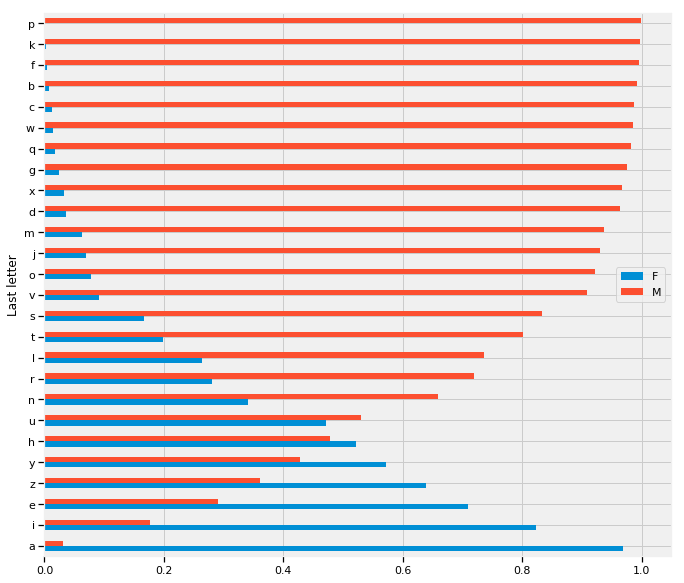

<AxesSubplot:>

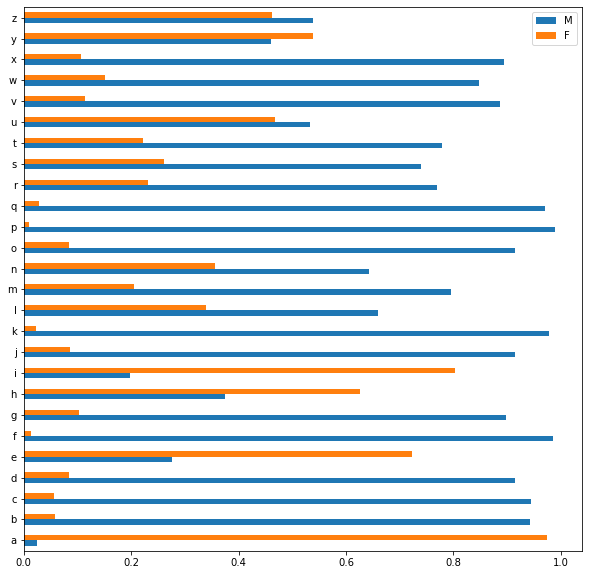

In [117]:
# your code to plot the graph as shown below (you need to consider all states, all years data)
### BEGIN SOLUTION

letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


modified = baby_names.copy() #error protection

modified['Last Letter'] = modified['Name'].str[-1] #make new column of the last letter

#modified.head()

uniqueLettersMale = modified.loc[modified['Sex'] == 'M']['Last Letter'].value_counts()
uniqueLettersFemale = modified.loc[modified['Sex'] == 'F']['Last Letter'].value_counts()

#maleNamesNum = modified.loc[modified['Sex'] == 'M'].count()
#femaleNamesNum =  modified.loc[modified['Sex'] == 'F'].count()

#print(len(modified)== (maleNamesNum + femaleNamesNum))

#loop through and grab each letter and calculate probability as needed, stuff into a list
malePercentages = []
femalePercentages = []

for c in letters:
    #grab the amounts of each
    total = uniqueLettersFemale[c] + uniqueLettersMale[c]
    malePercentages.append((uniqueLettersMale[c]/ total))
    femalePercentages.append((uniqueLettersFemale[c]/ total))
    
#print([malePercentages, femalePercentages])


df = pd.DataFrame({
    'M': malePercentages,
    'F': femalePercentages
}, index = letters)

df.plot.barh(figsize=(10, 10))



### END SOLUTIOlN

## Activity 2.10 What is your analysis of the question in Activity 2.9?

#### BEGIN SOLUTION
Altough this is just a smaller sample size of baby names over the years, there appears to be a coorelation between certain last letters of names and their associated sex. This is not saying that there is a causality, but there is possibility for deduction. For example, for an individual who's name ends with an A (in this sample), there is a 97% chance that they will be female, but nearly the opposite for individuals who's name end in an F. In fact, we've seen that the most popular names of all time across all states (in this dataset) is Mary and John, yet for the last letters of 'Y' and 'N', the probabilities are relatively even compared to letters like C,D, P, and Q. In terms of the question, I would say yes that it is possible to deduce, but not extrapolate to a general population. 
#### END SOLUTION

# Task 3 - Working with Movies
In this example, we will work with the movies.csv file

In this task we will use `groupby`. But before we jump into using the `groupby` function in Pandas, let's recap how grouping works in general for tabular data through a guided set of questions based on a **small** toy dataset of movies and genres. 

**Note:** If you want to see a visual of how grouping of data works, see "week 01 - Notebook" in the notebooks folder

**Problem Setting:** The summer 2018, there were a lot of good and bad movies that came out. Below is a dataframe with 5 columns: name of the movie as a `string`, the genre of the movie as a `string`, the first name of the director of the movie as a `string`, the average rating out of 10 on Rotten Tomatoes as an `integer`, and the total gross revenue made by the movie as an `integer`. The point of these guided questions (parts a and b) below is to understand how grouping of data works in general, **not** how grouping works in code. 

Below is the `movies` dataframe we are using, imported from the `movies.csv` file located in the `lab02` directory.

In [118]:
movies = pd.read_csv("data/movies.csv")
movies

,director,genre,movie,rating,revenue
0,David,Action & Adventure,Deadpool 2,7,318344544
1,Bill,Comedy,Book Club,5,68566296
2,Ron,Science Fiction & Fantasy,Solo: A Star Wars Story,6,213476293
3,Baltasar,Drama,Adrift,6,31445012
4,Bart,Drama,American Animals,6,2847319
5,Gary,Action & Adventure,Oceans 8,6,138803463
6,Drew,Action & Adventure,Hotel Artemis,8,6708147
7,Brad,Animation,Incredibles 2,5,594398019
8,Jeff,Comedy,Tag,6,54336863
9,J.A.,Science Fiction & Fantasy,Jurassic World: Fallen Kingdom,6,411873505


## Activity 3.1

If we grouped the `movies` dataframe above by `genre`, how many groups would be in the output and what would be the groups? Assign `num_groups` to the number of groups created and fill in `genre_list` with the names of genres as strings that represent the groups.

In [130]:
### BEGIN SOLUTION
num_groups = movies.groupby('genre').ngroups
genre_list = movies.genre.tolist()
### END SOLUTION

In [131]:
assert num_groups == 6
assert set(genre_list) == set(['Action & Adventure', 'Comedy', 'Science Fiction & Fantasy', 'Drama', 'Animation', 'Horror'])

## Activity 3.2

Whenever we group tabular data, it is usually the case that we need to aggregate values from the ungrouped column(s). If we were to group the `movies` dataframe above by `genre`, which column(s) in the `movies` dataframe would it make sense to aggregate if we were interested in finding how well each genre did in the eyes of people? Fill in `agg_cols` with the column name(s).

In [81]:
### BEGIN SOLUTION
agg_cols = 
### END SOLUTION

In [82]:
assert set(agg_cols) == set(['rating', 'revenue'])

Now, let's see `groupby` in action, instead of keeping everything abstract. To aggregate data in Pandas, we use the `.groupby()` [function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). The code below will group the `movies` dataframe by `genre` and find the mean/average revenue and rating for each genre. 

In [83]:
# write the code to get the table below


,rating,revenue
genre,,
Action & Adventure,6.333333,153569934.5
Animation,5.000000,374408165.0
Comedy,6.000000,56719237.4
Drama,6.000000,17146165.5
Horror,7.000000,68765655.0
Science Fiction & Fantasy,6.000000,312674899.0


## Activity 3.3: Grouping Multiple Columns

Let's look at the `movies` dataframe. Which of the following lines of code will output the following dataframe? Write your answer as either 1, 2, 3, or 4. Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>rating</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
    </tr>
    <tr>
      <th>genre</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Action &amp; Adventure</th>
      <td>208681866.0</td>
      <td>129228350.0</td>
      <td>318344544.0</td>
      <td>6708147.0</td>
    </tr>
    <tr>
      <th>Animation</th>
      <td>374408165.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>Comedy</th>
      <td>55383976.0</td>
      <td>30561590.0</td>
      <td>NaN</td>
      <td>111705055.0</td>
    </tr>
    <tr>
      <th>Drama</th>
      <td>NaN</td>
      <td>17146165.5</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>Horror</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>68765655.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>Science Fiction &amp; Fantasy</th>
      <td>NaN</td>
      <td>312674899.0</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

1) `pd.pivot_table(data=movies, index='genre', columns='rating', values='revenue', aggfunc=np.mean)`

2) `movies.groupby(['genre', 'rating'])['revenue'].mean()`

3) `pd.pivot_table(data=movies, index='rating', columns='genre', values='revenue', aggfunc=np.mean)`

4) `movies.groupby('revenue')[['genre', 'rating']].mean()`

## Activity 3.4

In [84]:
### BEGIN SOLUTION
answer = 
### END SOLUTION

## Activity 3.5: Merging


Time to put everything together! Merge `movies` and `babynames` to find the number of registered baby names for each director. Only include names that appear in both `movies` and `babynames`.

**Hint:** Take a look at the ``to_frame`` method of a series to do this. 

Your first row should look something like this:

**Note**: It is ok if you have 2 separate columns with names instead of just one column.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>director</th>
      <th>genre</th>
      <th>movie</th>
      <th>rating</th>
      <th>revenue</th>
      <th>Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>David</td>
      <td>Action &amp; Adventure</td>
      <td>Deadpool 2</td>
      <td>7</td>
      <td>318344544</td>
      <td>371646</td>
    </tr>
  </tbody>
</table>
</table>

In [85]:
### BEGIN SOLUTION
merged_df = 
### END SOLUTION

,director,genre,movie,rating,revenue,Name,Count
0,David,Action & Adventure,Deadpool 2,7,318344544,David,3605910
1,Bill,Comedy,Book Club,5,68566296,Bill,154317
2,Ron,Science Fiction & Fantasy,Solo: A Star Wars Story,6,213476293,Ron,32758
3,Baltasar,Drama,Adrift,6,31445012,Baltasar,10
4,Bart,Drama,American Animals,6,2847319,Bart,12769
5,Gary,Action & Adventure,Oceans 8,6,138803463,Gary,898821
6,Drew,Action & Adventure,Hotel Artemis,8,6708147,Drew,76048
7,Brad,Animation,Incredibles 2,5,594398019,Brad,80125
8,Jeff,Comedy,Tag,6,54336863,Jeff,114553
9,Charles,Comedy,Uncle Drew,5,42201656,Charles,2280600


In [93]:
### BEGIN SOLUTION
# complete the assertions
assert merged_df.loc[0, 'Count'] == ??
assert merged_df.loc[3, 'Count'] == ?? 
assert merged_df.loc[7, 'Count'] == ??
assert merged_df['Count'].sum() == ??
assert len(merged_df) == ??
### END SOLUTION

## Activity 3.6

How many directors in the original `movies` table did not get included in the `merged_df` dataframe? Please explain your answer in 1-2 sentences.

In [94]:
### BEGIN SOLUTION
answer =
### END SOLUTION

EXPLANATION: 

## Activity 3.7 (open ended)
The site https://grouplens.org/datasets/movielens/ contains data sets about movies and ratings. This is an open ended activity for you to look into the site and think about some interesting questions you can ask and answer with the data given. Come up with 3 interesting questions and find the answers using data sets given (keep the data set sizes manageable to assure that you can process them locally.)

# Submission Instructions

### Please Remove all output before submission

### File Name: Please name the file in the style (section_netID_Lab2.ipynb) 1_adg133_Lab2.ipynb

### Submit To: Canvas --> Assignments --> Lab2 

Warning: Failure to follow directions may result in loss of points.

## Feedback  (please edit this cell)
Please provide feedback on this lab. Thank you.
1. How would you rate this lab from a scale of 1-10 (10-best?
2. What components of the lab you enjoyed the most (if any):
3. What parts of the lab, you did not find interesting at all? (if any)
4. What other comments can you provide to improve this lab?

@2021 A.D. Gunawardena. Thanks to many people who proof read this lab and provide good feedback. Also thanks to Berkeley Data Science Group for the suggested ideas for this lab. 